<a href="https://colab.research.google.com/github/Abhiruchi37/Recommendation-System-for-Retail-Stores/blob/main/Recommendation_System_for_Retail_Stores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas numpy scikit-surprise matplotlib seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163483 sha256=d8df8913225d9586fe0756fceebaf4e32b3c9d6e30e7bbac05e609b58cc3dcab
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy


In [ ]:
# Load your retail dataset (replace 'retail_data.csv' with your dataset)
df = pd.read_csv('/content/ratings_Beauty.csv')


In [ ]:
# Display the first few rows of the dataset
print(df.head())

           UserId   ProductId  Rating   Timestamp
0  A39HTATAQ9V7YF  0205616461     5.0  1369699200
1  A3JM6GV9MNOF9X  0558925278     3.0  1355443200
2  A1Z513UWSAAO0F  0558925278     5.0  1404691200
3  A1WMRR494NWEWV  0733001998     4.0  1382572800
4  A3IAAVS479H7M7  0737104473     1.0  1274227200


In [ ]:
# Explore dataset statistics
print(df.describe())

              Rating     Timestamp
count  128684.000000  1.286840e+05
mean        4.170705  1.333768e+09
std         1.317383  7.379056e+07
min         1.000000  9.087552e+08
25%         4.000000  1.308874e+09
50%         5.000000  1.361232e+09
75%         5.000000  1.384992e+09
max         5.000000  1.406074e+09


In [ ]:
df.shape

(128684, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128684 entries, 0 to 128683
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   UserId     128684 non-null  object 
 1   ProductId  128684 non-null  object 
 2   Rating     128684 non-null  float64
 3   Timestamp  128684 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 3.9+ MB


In [ ]:
df.isnull().sum()

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

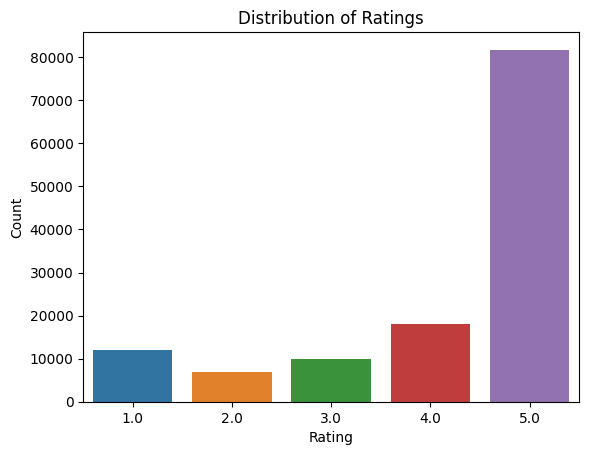

In [ ]:
# Visualize distribution of ratings
sns.countplot(x='Rating', data=df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
popular = pd.DataFrame(df.groupby('ProductId')['Rating'].count())
most_popular = popular.sort_values('Rating', ascending=False)
most_popular.head(10)

,Rating
ProductId,
B0000YUXI0,2143
B000142FVW,1558
B00021DVCQ,1051
B0002JKPA4,1046
B00016XJ4M,845
B00067YSLO,795
B00006IV2F,704
B0000632EN,686
B0002Z8HAI,680


<Axes: xlabel='ProductId'>

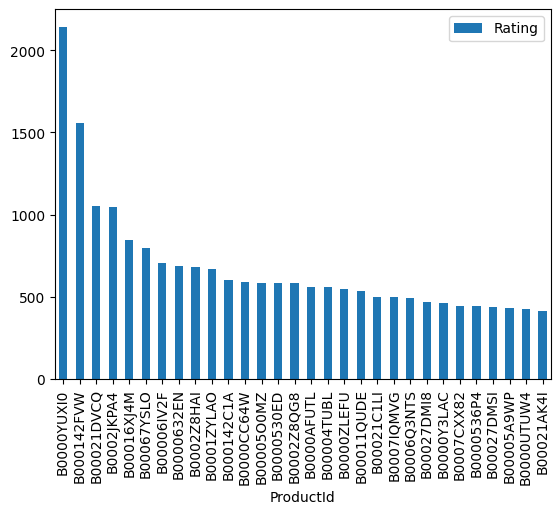

In [ ]:
most_popular.head(30).plot(kind = "bar")

In [ ]:
# Drop duplicates and handle missing values if necessary
df = df.drop_duplicates()
df = df.dropna()

In [ ]:
# Create a Surprise dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['UserId', 'ProductId', 'Rating']], reader)


In [ ]:
# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
from surprise import SVD
# Model Selection - Collaborative Filtering (SVD)
model = SVD()
model.fit(trainset)

In [ ]:
# Make predictions on the test set
predictions = model.test(testset)


In [ ]:
# Evaluate the model
accuracy.rmse(predictions)


RMSE: 1.2677


1.2676566073140105

In [ ]:
# Recommend items for a specific user (replace 'user_id' with an actual user ID)
user_id = 'user_id'
items_to_recommend = []

In [ ]:
for item_id in df['ProductId'].unique():
    if not df[(df['UserId'] == user_id) & (df['ProductId'] == item_id)].any().any():
        items_to_recommend.append((item_id, model.predict(user_id, item_id).est))


In [ ]:
# Get top N recommendations
top_recommendations = sorted(items_to_recommend, key=lambda x: x[1], reverse=True)[:5]


In [ ]:
print(f'Top 5 Recommendations for User {user_id}:')
for recommendation in top_recommendations:
    print(f"Product ID: {recommendation[0]}, Estimated Rating: {recommendation[1]:.2f}")

Top 5 Recommendations for User user_id:
Product ID: B0000Y3LKM, Estimated Rating: 4.91
Product ID: B0006NYCT6, Estimated Rating: 4.91
Product ID: B0007CZXQC, Estimated Rating: 4.84
Product ID: B0006B65PC, Estimated Rating: 4.83
Product ID: B00005323F, Estimated Rating: 4.83
